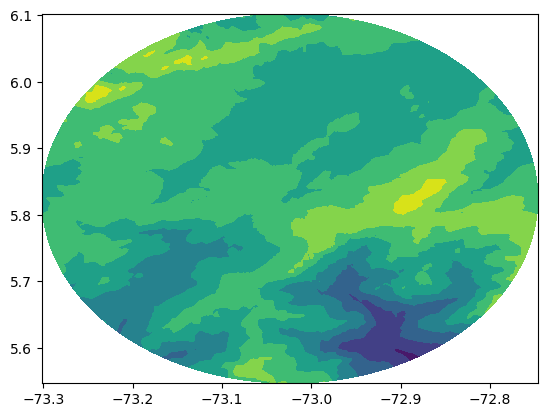

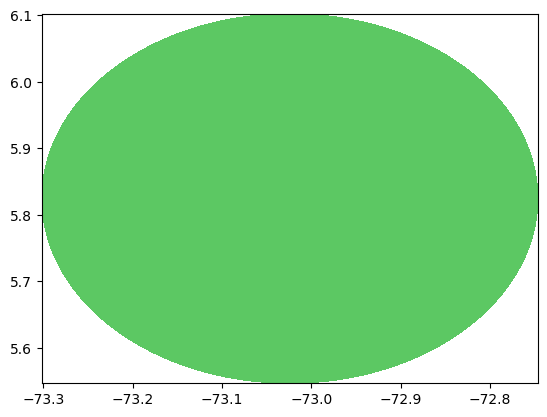

C:\Users\JHON'T\AppData\Local\Temp\ipykernel_27444\3769915208.py:193: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = contour.collections[0].get_paths()


IndexError: list index out of range

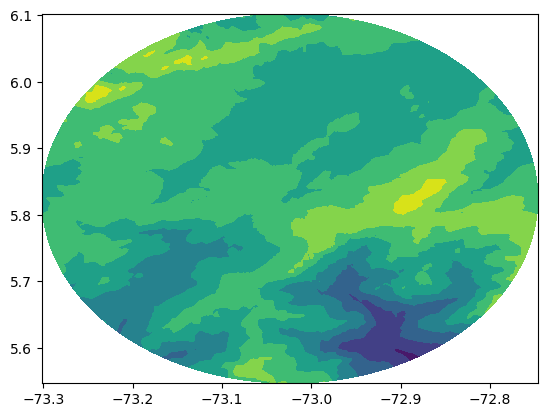

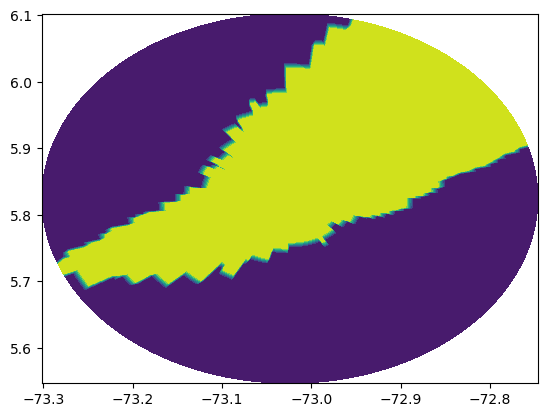

SystemExit: 0

C:\Users\JHON'T\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py:3534: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [1]:
import sys
from PyQt5.QtWidgets import QApplication, QWidget, QHBoxLayout, QVBoxLayout, QGridLayout, QPushButton, QLineEdit, QLabel, QSpinBox
from PyQt5.QtWebEngineWidgets import QWebEngineView, QWebEnginePage 
import pyperclip
import numpy as np
from pyqtlet import L, MapWidget
import matplotlib.pyplot as plt

"""

Python code by Jhon Amaya

Replace the self.route at beggining of init with the route of the .xyz DEM file and run 

"""

class MapWindow(QWidget):
    def __init__(self):

        # constants and data required
        self.route = r"D:\Documentos\UdeA\Geoposicionamiento\DataRadar\CapeUsedRadar2.xyz"
        self.Data, self.Lats, self.Lngs, self.boundsReal = self.LoadData()
        self.rad = np.pi/180
        self.deg = 1/30/3600
        self.resolution = 1000 #m
        
        # Setting up the widgets and layout
        
        super().__init__()
        self.mapWidget = MapWidget()
        self.layout = QGridLayout()
        self.labelinit = QLabel("Latitud, longitud:")
        self.LatLongText = QLineEdit()
        self.Button_Paste = QPushButton("Paste")
        self.Button_SelectPoint = QPushButton("Select")
        self.LabelLatLong = QLabel("Select a point")
        self.LabelRHeight = QLabel("Radar height")
        self.RHeightText = QSpinBox()
        self.RHeightText.setSuffix(' m')
        self.RHeightText.setMinimum(0)
        self.RHeightText.setMaximum(1000)
        self.LabelRange = QLabel("Range")
        self.RangeText = QSpinBox()
        self.RangeText.setSuffix(' m')
        self.RangeText.setMinimum(0)
        self.RangeText.setMaximum(30000)
        self.RangeText.setValue(30000)
        self.LabelTop = QLabel("Top Angle")
        self.TopText = QSpinBox()
        self.TopText.setSuffix(' °')
        self.TopText.setMinimum(40)
        self.TopText.setMaximum(90)
        self.TopText.setValue(90)
        self.LabelBot = QLabel("Bot Angle")
        self.BotText = QSpinBox()
        self.BotText.setSuffix(' °')
        self.BotText.setMinimum(-50)
        self.BotText.setMaximum(40)
        self.BotText.setValue(-10)
        self.LabelTarget = QLabel("Target Height")
        self.TargetText = QSpinBox()
        self.TargetText.setSuffix(' m')
        self.TargetText.setMinimum(0)
        self.TargetText.setMaximum(12000)
        self.TargetText.setValue(10000)
        self.Button_Run = QPushButton("Run")
        
            
                
        self.Button_Paste.clicked.connect(self.Paste)
        self.Button_SelectPoint.clicked.connect(self.Select)
        self.Button_Run.clicked.connect(self.Run)
        self.layout.addWidget(self.labelinit, 0, 0,1,2)
        self.layout.addWidget(self.LatLongText, 1, 0,1,2)
        self.layout.addWidget(self.Button_Paste, 2, 0,1,1)
        self.layout.addWidget(self.Button_SelectPoint, 2, 1,1,1)
        self.layout.addWidget(self.LabelLatLong, 3, 0,1,2)
        self.layout.addWidget(self.mapWidget,0,3,20,8)
        self.layout.addWidget(self.LabelRHeight,4,0,1,1)
        self.layout.addWidget(self.RHeightText,4,1,1,1)
        self.layout.addWidget(self.LabelRange,5,0,1,1)
        self.layout.addWidget(self.RangeText,5,1,1,1)
        self.layout.addWidget(self.LabelTop,6,0,1,1)
        self.layout.addWidget(self.TopText,6,1,1,1)
        self.layout.addWidget(self.LabelBot,7,0,1,1)
        self.layout.addWidget(self.BotText,7,1,1,1)
        self.layout.addWidget(self.LabelTarget,8,0,1,1)
        self.layout.addWidget(self.TargetText,8,1,1,1)
        self.layout.addWidget(self.Button_Run, 9, 0,1,1)
        self.setLayout(self.layout)

       
        # addind pyqtlet map with bounds and click event
        
        self.map = L.map(self.mapWidget)
        self.map.setView([(self.boundsReal[1][0]-self.boundsReal[0][0])/2, (self.boundsReal[1][1]-self.boundsReal[0][1])/2], 9)
        L.tileLayer('http://{s}.tile.osm.org/{z}/{x}/{y}.png').addTo(self.map)
        self.bounds = [[self.boundsReal[0][0]+30000*self.deg,self.boundsReal[0][1]+30000*self.deg],[self.boundsReal[1][0]-30000*self.deg,self.boundsReal[1][1]-30000*self.deg]]
        L.rectangle(self.bounds,{"fillOpacity":0}).addTo(self.map)
        self.map.setMaxBounds(self.boundsReal)
        self.map.clicked.connect(self.add_marker)
        self.show()

    # Functions
    
    def LoadData(self):
        with open(self.route, 'r') as xyz_file:
            lines = xyz_file.readlines()#[:] # Skipping the first two lines
            Data = []
            for line in lines:
                Data.append(line.split())
            for i in range(len(Data)):
                Data[i][0]=float(Data[i][0])
                Data[i][1]=float(Data[i][1])
                Data[i][2]=float(Data[i][2])
        i = 0
        while True:
            if Data[0][1] == Data[i][1]:
                i+=1
            else:
                break
        lats = i
        longs = int(len(Data)/i)
        bounds = [[Data[-1][1],Data[0][0]],[Data[0][1],Data[-1][0]]]
        return Data, lats, longs, bounds
    
    def Paste(self):
        ClipBoard = pyperclip.paste()
        self.LatLongText.setText(ClipBoard)
    
    def Select(self):
        labeltext = self.LatLongText.text().split(",")
        if len(labeltext) != 2:
            self.LabelLatLong.setText("Invalid coordinates")
        else:
            lat = float(labeltext[0])
            long = float(labeltext[1])
            point = {'latlng':{'lat':lat,'lng':long}}
            self.add_marker(point)
    
    def Run(self):
        try:
            for i in self.Polygs:
                self.map.removeLayer(i)
            
        except:
            pass
        originElevation = self.averageElevation(self.LatLong)+float(self.RHeightText.text()[:-2])
        Rs = int(int(self.RangeText.text()[:-2])/self.resolution) 
        a_max = float(self.TopText.text()[:-2])*self.rad
        a_min = float(self.BotText.text()[:-2])*self.rad
        l = np.tan(a_max)
        m = np.tan(a_min)
        diff = int(int(self.TargetText.text()[:-2])-int(self.RHeightText.text()[:-2]))
        initial = int(abs(diff)/np.tan(a_max)/self.resolution)+1
        cover = np.zeros((Rs*360,4))
        for i in range(360):
            for j in range(self.resolution,Rs*self.resolution+self.resolution,self.resolution):
                x = j*np.cos(i*np.pi/180)
                y = j*np.sin(i*np.pi/180)
                Lat = self.LatLong[0]+(x*self.deg)
                Long = self.LatLong[1]+(y*self.deg)
                cover[i*Rs+int(j/self.resolution)-1,:3] = Lat,Long,self.averageElevation([Lat,Long])
            if l >= np.tan(88*self.rad): ## Para que tome siempre el punto encima del radar si es un angulo de apertura superior de 90°
                cover[Rs*i,3] = 1
            for j in range(1,Rs+1):
                if cover[Rs*i+j-1,2]+int(self.TargetText.text()[:-2]) > (l*j*self.resolution+int(self.RHeightText.text()[:-2])+originElevation):
                    cover[Rs*i+j-1,3] = 0
                else:
                    if cover[Rs*i+j-1,2]+int(self.TargetText.text()[:-2]) < (m*j*self.resolution+int(self.RHeightText.text()[:-2])+originElevation):
                        cover [Rs*i+j-1,3] = 0
                    else:
                        n = diff/(j*self.resolution)
                        for k in range(1,j):
                            height = k*self.resolution*n+int(self.RHeightText.text()[:-2])+originElevation
                            if cover[Rs*i+k-1,2] >= height:
                                cover[int(Rs*i)+j-1,3] = 0
                                break
                            else:
                                cover[int(Rs*i)+j-1,3] = 1
                        
                        
                    
                
        plt.tricontourf(cover[:,1],cover[:,0],cover[:,2])
        plt.show()
        fig, ax = plt.subplots()
        contour = ax.tricontourf(cover[:,1],cover[:,0],cover[:,3])
        plt.show()
        
        # Extract the contour data
        
        paths = contour.collections[0].get_paths()
        polygon_data = []
        for path in paths:
            vertices = path.vertices
            polygon = []
            for vertex in vertices:
                polygon.append([vertex[1], vertex[0]])  # Flip x and y for LatLng format
            polygon_data.append(polygon)
        if len(polygon_data[0]) == 0:
            pass
        else:
            i = 0
            self.Polygs = []
            while True:
                polygs = []
                polygs.append(polygon_data[0][i])
                while True:
                    if i >= len(polygon_data[0])-1:
                        break
                    if (polygon_data[0][i+1][0]-polygon_data[0][i][0])**2+(polygon_data[0][i+1][1]-polygon_data[0][i][1])**2 > 8000*self.deg:
                        i+=1
                        break
                    else:
                        i+=1
                        polygs.append(polygon_data[0][i])
                polygons = L.polygon(
                            polygs)
                self.map.addLayer(polygons);
                self.Polygs.append(polygons)
                if i >= len(polygon_data[0])-1:
                    break
        
        
    def add_marker(self, point):
        try:
            self.map.removeLayer(self.marker)
            self.map.removeLayer(self.circle)
            for i in self.Polygs:
                self.map.removeLayer(i)
        except:
            pass
        if (self.bounds[0][0] < point['latlng']['lat'] < self.bounds[1][0]) and (self.bounds[0][1] < point['latlng']['lng'] < self.bounds[1][1]):
            self.Button_Run.setEnabled(True)
            self.marker = L.marker(point['latlng'], options={"draggable": 'true'})
            self.circle = L.circle(point['latlng'], int(int(self.RangeText.text()[:-2])),options={"color": 'black',"fillOpacity":0})
            self.LabelLatLong.setText(f"Lat: {point['latlng']['lat']:.3f} Long: {point['latlng']['lng']:.3f}")
            self.LatLong = [point['latlng']['lat'],point['latlng']['lng']]
            self.map.addLayer(self.marker)
            self.map.addLayer(self.circle)
        else:
            self.Button_Run.setEnabled(False)
            self.LabelLatLong.setText("Ingrese una posición valida")
            #self.LatLong = None

    def averageElevation(self,point):
        
        llat = int(self.Lats*(point[0]-self.boundsReal[0][0])/(self.boundsReal[1][0]-self.boundsReal[0][0]))
        llong = int(self.Lngs*(point[1]-self.boundsReal[0][1])/(self.boundsReal[1][1]-self.boundsReal[0][1]))
        Index = (self.Lats-llat+1)*self.Lats+llong-1
        newElevation = (self.Data[Index][2]+self.Data[Index-1][2]+self.Data[Index+self.Lats-1][2]+self.Data[Index+self.Lats][2])/4
        
        return newElevation

# Start the interface

if __name__ == '__main__':
    app = QApplication(sys.argv)
    widget = MapWindow()
    widget.setFixedSize(1366,900)
    sys.exit(app.exec_())